### SVM Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

### Load Dataset

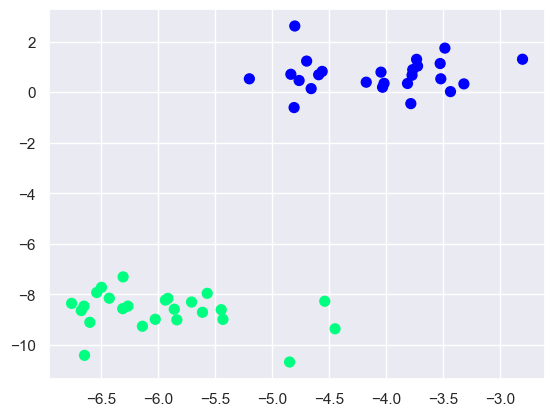

In [22]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=50, centers=2, random_state=17, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

In [23]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, kernel='linear')

In [27]:
def plot_svc_decision_fuction(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()

    xlim= ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors='k',
                levels=[-1, 0, 1], alpha=0.5, 
                linestyles=['--', '-', '--'])
            
    # plots support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                    model.support_vectors_[:, 1],
                    s=300, linewidth=1, facecolors='none');
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)




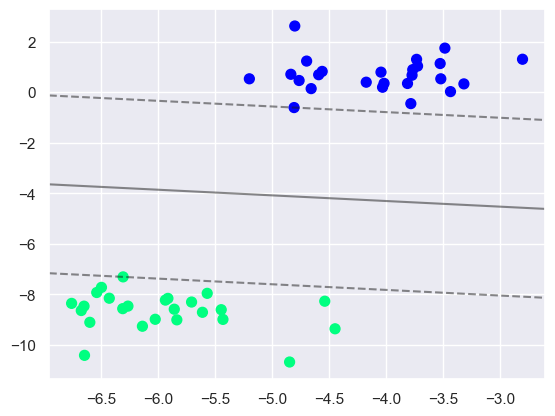

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_fuction(model);

### Kernal Trick SVM

In [8]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

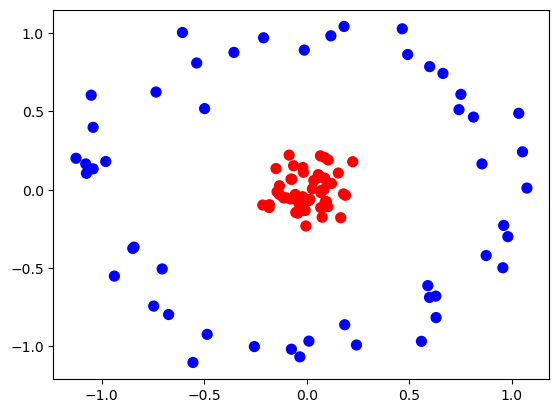

In [5]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [9]:
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.65

In [13]:
import numpy as np

zero_one_colourmap = ListedColormap(("blue", "red"))
def plot_decision_boundary(X,y,clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start= X_set[:, 0].min() - 1, 
                                   stop=X_set[:, 0].max() + 1,
                                   step=0.01),
                                   np.arange(start = X_set[:, 1].min() -1, 
                                             stop = X_set[:, 1].max() + 1, step=0.01))
    plt.contour(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
                alpha=0.75,
                cmap=zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set==j, 0], X_set[y_set == j, 1], c= (zero_one_colourmap)(i), label =j)
        plt.title("SVM Decision Boundary")
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.legend()
        return plt.show()

/var/folders/m9/j9s4np6n4093jb6mgddz4btw0000gn/T/ipykernel_2187/1455347272.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set == j, 1], c= (zero_one_colourmap)(i), label =j)


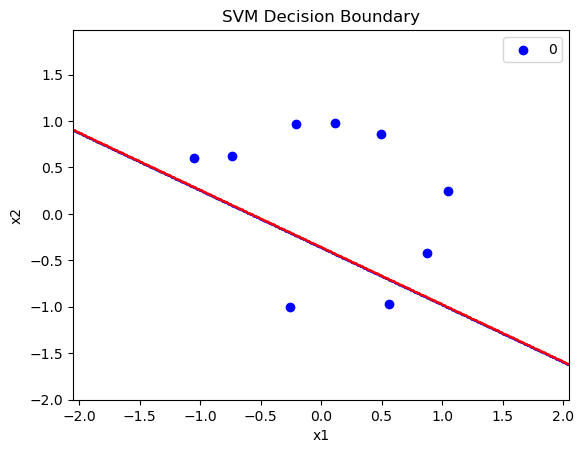

In [14]:
plot_decision_boundary(X_test, y_test, classifier)

In [18]:
def plot_3d_plot(X,y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("y")
    return ax


<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

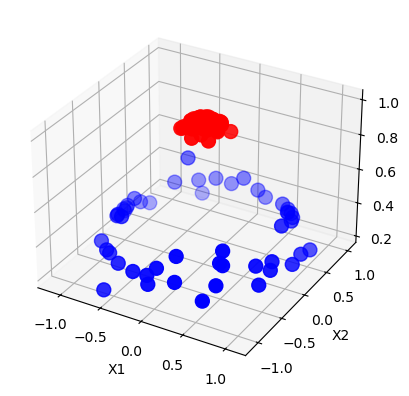

In [19]:
plot_3d_plot(X,y)